# COMP7404 Assignment 3 - Basic Classifiers

In this assignment you will implement the basic classifiers discussed in class. This assignment is based on work by Li-Yi Wei et al. and our textbook Python Machine Learning (2nd Edition).

# Submission

Submit a single uid.ipynb file to moodle before the deadline. Ensure your file can be executed on Google Colab.

# Hand-written Digit Classification

In class we applied different scikit-learn classifers for the Iris data set.

In this assignment, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters using a validation set, and compare their performance via an accuracy score on a test set.
Add sections for a discussions of results. Which classifier(s) perform(s) the best and worst, and why? 

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

## Load data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

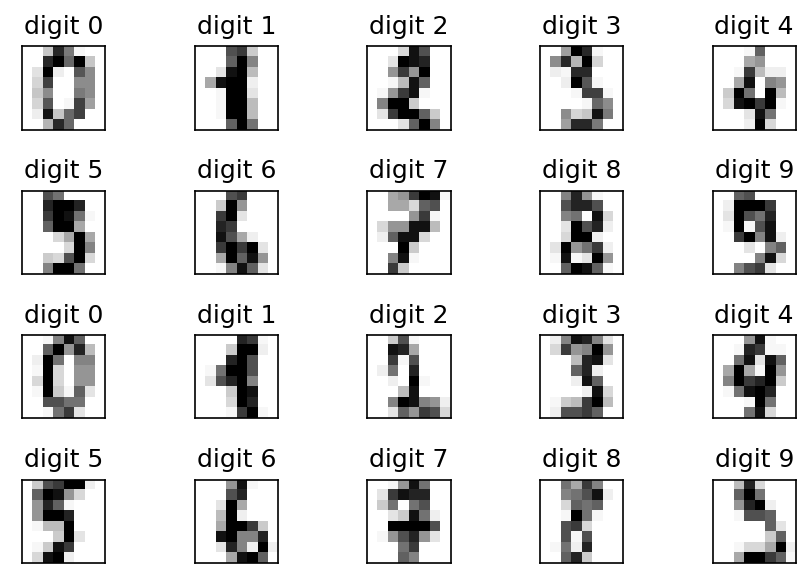

In [2]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Date Preprocessing
Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [3]:
# Your code comes here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Feature scaling
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1257, 64) (540, 64)
(1257,) (540,)


Before training models, I want know what the class distribution looks like. I use `TSNE` to reduce the dimention and then visualize it. 

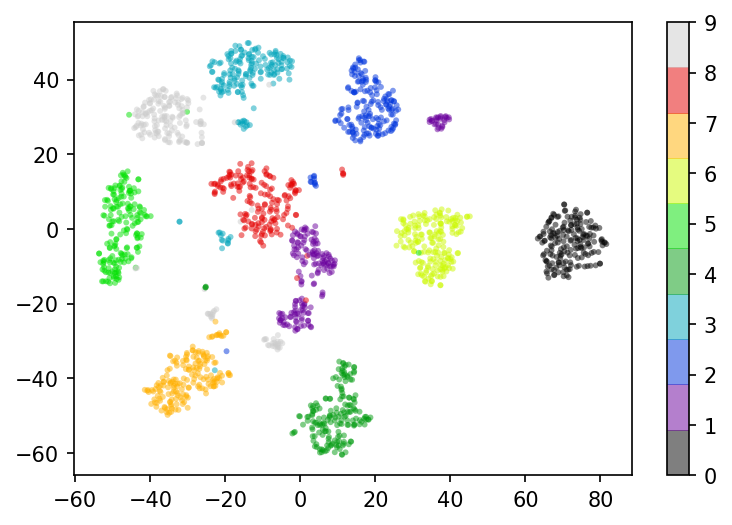

In [4]:
# from sklearn.decomposition import PCA
# X2d = PCA(n_components=2).fit_transform(X, y)
from sklearn.manifold import TSNE
X2d = TSNE(n_components=2, init='random', random_state=0).fit_transform(X, y)
plt.scatter(X2d[:, 0], X2d[:, 1], c=y, s=8, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

It can be seen from the chart that most digits such as '0', '4' and '5' are very easy to indentify, while some instances of digits such as '8' and '9' are mixed with instances of other class. 

## Classifier #1 Perceptron

In [5]:
# Your code, including traing and testing, to observe the accuracies.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
estimator = Perceptron(max_iter=40, random_state=0)
parameters = {'tol': [0.001, 0.01, 0.1], 'eta0': [0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy', iid=False)
clf.fit(X_train, y_train)
clf.best_estimator_

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
# model definition
ppn = Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
      fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
      penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)
# training
ppn.fit(X_train, y_train)
# training accuracy
print('Training accuracy: %.3f' % accuracy_score(y_train, ppn.predict(X_train)))
# testing
print('Testing accuracy: %.3f' % accuracy_score(y_test, ppn.predict(X_test)))

Training accuracy: 0.975
Testing accuracy: 0.944


## Classifier #2 Logistic Regression

In [7]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(solver='liblinear', multi_class='ovr')
parameters = {'C': [0.1, 0.5, 1.0], 'tol': [0.0001, 0.001, 0.1, 1.0]}
clf = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy', iid=False)
clf.fit(X_train, y_train)
clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='ovr', n_jobs=None, penalty='l2',
                        random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                        warm_start=False)
lr.fit(X_train, y_train)
print('Training accuracy: %.3f' % accuracy_score(y_train, lr.predict(X_train)))
print('Testing accuracy: %.3f' % accuracy_score(y_test, lr.predict(X_test)))

Training accuracy: 0.989
Testing accuracy: 0.963


## Classifier #3 SVM

In [9]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import LinearSVC, SVC
estimator = SVC(gamma='auto', max_iter=1000, random_state=1)
parameters = {'C': [0.1, 0.5, 1.0], 'kernel': ['poly', 'rbf', 'sigmoid']}
clf = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy', iid=False)
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=1000, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
# svm = LinearSVC(penalty='l2', loss='squared_hinge', tol=0.001, C=1.0, multi_class='ovr', max_iter=10000)
svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
          max_iter=1000, probability=False, random_state=1, shrinking=True, tol=0.001,
          verbose=False)
svm.fit(X_train, y_train)
print('Training accuracy: %.3f' % accuracy_score(y_train, svm.predict(X_train)))
print('Testing accuracy: %.3f' % accuracy_score(y_test, svm.predict(X_test)))

Training accuracy: 0.998
Testing accuracy: 0.987


## Classifier #4 Decision Tree

In [11]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=1)
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20]}
clf = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy', iid=False)
clf.fit(X_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [12]:
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_impurity_split=None,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, presort=False,
                              random_state=1, splitter='best')
tree.fit(X_train, y_train)
print('Training accuracy: %.3f' % accuracy_score(y_train, tree.predict(X_train)))
print('Testing accuracy: %.3f' % accuracy_score(y_test, tree.predict(X_test)))

Training accuracy: 0.999
Testing accuracy: 0.880


## Classifer #5 Random Forest

In [13]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(max_depth=10, random_state=1)
parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': [50, 100, 150]}
clf = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy', iid=False)
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                max_depth=10, max_features='auto', max_leaf_nodes=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=None, oob_score=False, random_state=1, verbose=0,
                                warm_start=False)
forest.fit(X_train, y_train)
print('Training accuracy: %.3f' % accuracy_score(y_train, forest.predict(X_train)))
print('Testing accuracy: %.3f' % accuracy_score(y_test, forest.predict(X_test)))

Training accuracy: 1.000
Testing accuracy: 0.969


## Classifier #6 KNN

In [15]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(p=2, metric='minkowski')
parameters = {'n_neighbors': [3, 5, 7, 9]}
clf = GridSearchCV(estimator, parameters, cv=5, scoring='accuracy', iid=False)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                           weights='uniform')
knn.fit(X_train, y_train)
print('Training accuracy: %.3f' % accuracy_score(y_train, knn.predict(X_train)))
print('Testing accuracy: %.3f' % accuracy_score(y_test, knn.predict(X_test)))

Training accuracy: 0.983
Testing accuracy: 0.981


## Discussions of results

Since the number of training samples are not too many, splitting out a small validation set may result in inaccuracy when choosing the hyper-parameters of the classifiers. Therefore, I use `GridSearchCV`, which uses **k-fold cross validation** so that every fold of samples will be used as validation set. After fitting the training data, `GridSearchCV` produces a best estimator, and I use the parameters that it choose for me to test. In this case, the testing set stays invisible during the **hyper-parameter optimization**. 

As shown above, SVM (`sklearn.svm.SVC`) has the highest testing classification accuracy (98.7%) while Decision tree (`sklearn.tree.DecisionTreeClassifier`) has the lowest accuracy (88%), so in term of accuracy, I think **SVM** is the best classifier and **Decision tree** is the worst. 

I think the relatively bad performance of Decision tree is because a tree node is split based on a feature, which is a pixel in the picture. However, the values of this pixel in the same digit could be different because of different writing styles. So a single tree may not be able to capture this characteristic very well and it could easily result in **overfitting**. We can know the desision tree is overfitting from that its training accuracy is almost 100 percent while the testing accuracy is only 88 percent. On the contrast, Random forest performs much better since different trees in the forest capture different characteristics and they can make good prediction by voting. 

The good performance of SVM is mostly because of the **kernel function** it uses. In my case, I choose `rbf` (Gaussian kernel) as the kernel function, which can map the data into a higher dimensional space. So the SVM with Gaussian kernel can fit well to **not linearly separable** data. Also, by choosing a suitable value of parameter C, SVM can avoid overfitting very well. So SVM can perform well in my tests.